<a href="https://colab.research.google.com/github/JeffersonBP/Aula-_JavascriptJeff/blob/main/Visualisa%C3%A7%C3%A3o_de_Dados_T4_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Aluno : Jefferson Batista Pereira Fone: 081 9 86961685 Email: Eneg.jeffersonbatista@gmail.com**

Tentativas ilimitadas permitidas
Disponível até 24 de Set de 2023 23:59Disponível até 24 de Set de 2023 23:59

Para esta atividade, vamos explorar o dataset da Netflix, disponível no Kaggle. Teremos 2 etapas:



1) Análise exploratória de dados

2) Análise de uma série temporal



Para isso, vamos utilizar o Google Colaboratory desenvolvendo um notebook para esta atividade.



Vamos trabalhar, primeiramente com a Análise Exploratória de Dados, conhecendo dataset, número de exemplares e tipos de dados. Registre os resultados no Colab/Notebook. Utilize também uma visualização que julgue aderente a esta análise, como as que vimos na trilha 3, sobre análise exploratória.

Em seguida, vamos desenvolver uma visualização de série temporal para finalizar a atividade.



Sugerimos utilizar o Matplotlib ou o Seaborn para produzir as visualizações em Python. Veja os exemplos nos e-books das trilhas 3 e 4.  

Baixe o arquivo CSV, disponível no link:

https://www.kaggle.com/shivamb/netflix-shows Links to an external site..



Em seguida, abra um notebook novo no Google/Colaboratory https://colab.research.google.com/notebooks/intro.ipynb#recent=true Links to an external site.   



Suba o arquivo baixado no Kaggle para desenvolver as etapas de Análise Exploratória e a Série Temporal.

Encaminhe o arquivo notebook com o código desenvolvido na tarefa para avaliação.

Saving netflix_titles.csv to netflix_titles (13).csv
Dados carregados com sucesso!
Número de linhas: 8807
Número de colunas: 12
Primeiras 5 linhas do data frame
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rat

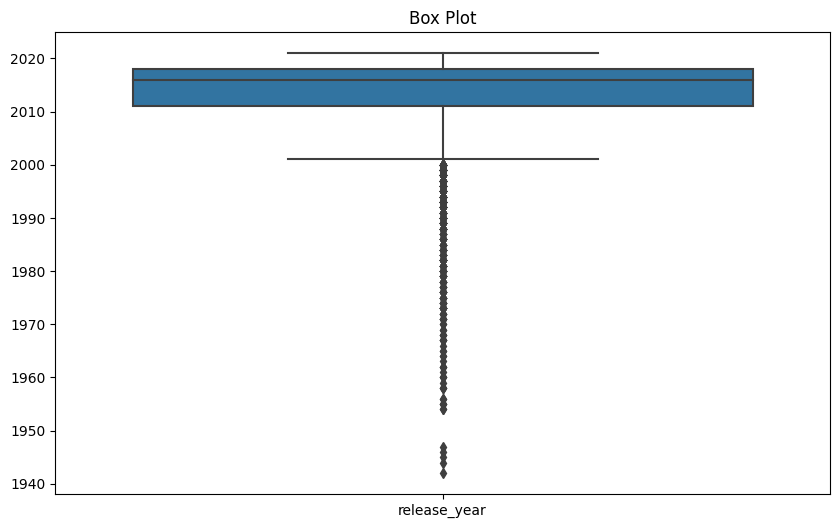

Valores não convertidos:
Series([], Name: date_added, dtype: datetime64[ns])


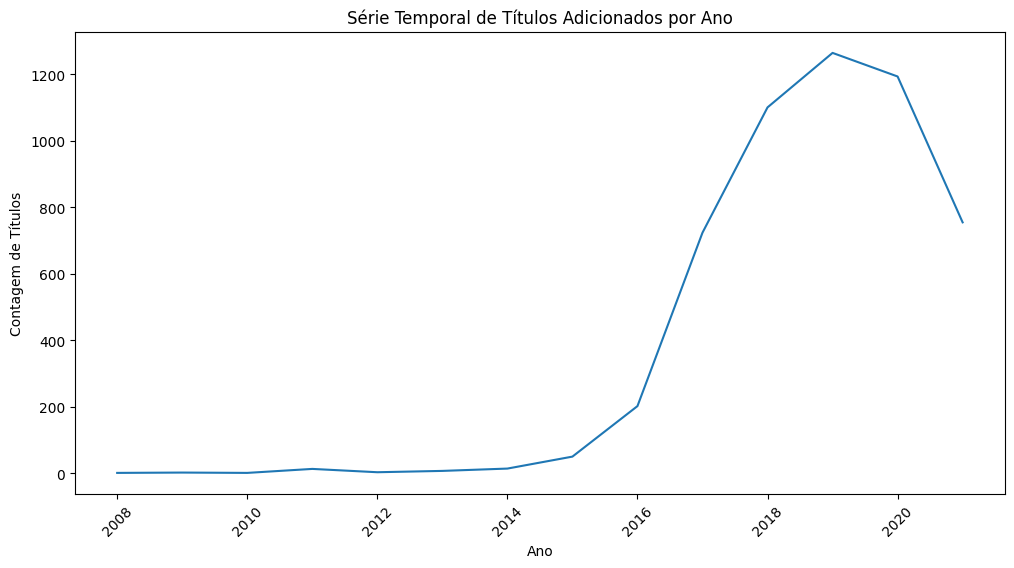

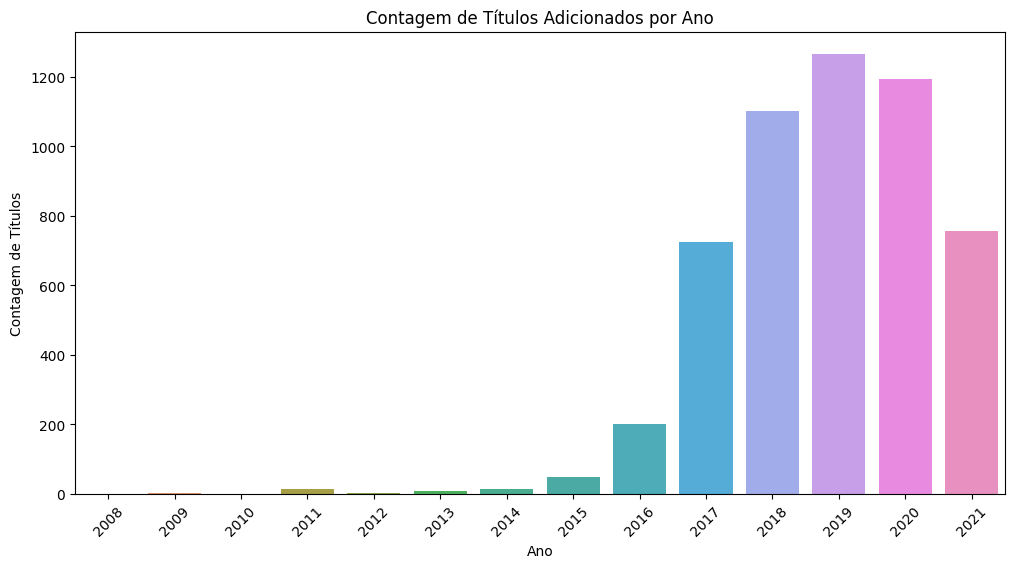

     Ano  Contagem
12  2008         1
11  2009         2
13  2010         1
8   2011        13
10  2012         3
9   2013         7
7   2014        14
6   2015        50
5   2016       202
4   2017       724
2   2018      1101
0   2019      1265
1   2020      1194
3   2021       755


In [25]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Fazer upload do arquivo CSV do seu computador para o Google Colab
uploaded = files.upload()

# Carregar o arquivo CSV


for file_name in uploaded.keys():
    df = pd.read_csv('netflix_titles.csv')

# Verificar se os dados foram carregados corretamente
print("Dados carregados com sucesso!")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# imprimir as primeiras 5 linhas do dataframe

print("Primeiras 5 linhas do data frame")
print(df.head())

# Imprimir as últimas 5 linhas do DataFrame
print("Ultimas  5 linhas do data frame")
print(df.tail())

# Verificar informações básicas sobre os dados
print("\nInformações básicas sobre os dados:")
print(df.info())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

# Lidar com valores nulos (se houver)
# Remover linhas com valores nulos
df = df.dropna()

# Verificar se há valores nulos restantes
print("\nVerificar se há valores nulos:")
print(df.isnull().sum())

# Plotar gráficos exploratórios
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot")
plt.show()


# Remova espaços em branco extras da coluna "date_added"
df['date_added'] = df['date_added'].str.strip()

# Converta a coluna "date_added" em um objeto datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Verifique se houve erros na conversão
print("Valores não convertidos:")
print(df[df['date_added'].isnull()]['date_added'])

# Remova linhas com valores não convertidos (NaN)
df = df.dropna(subset=['date_added'])


# Crie uma série temporal com a contagem de títulos lançados por ano
series_temporal = df['date_added'].dt.year.value_counts().reset_index()
series_temporal.columns = ['Ano', 'Contagem']

# Ordene os dados pela coluna "Ano"
series_temporal = series_temporal.sort_values(by='Ano')

# Crie um gráfico de série temporal com anos no eixo x e contagem no eixo y
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ano', y='Contagem', data=series_temporal)
plt.title("Série Temporal de Títulos Adicionados por Ano")
plt.xlabel("Ano")
plt.ylabel("Contagem de Títulos")
plt.xticks(rotation=45)
plt.show()


# Crie um gráfico de barras com anos no eixo x e contagem no eixo y
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Contagem', data=series_temporal)
plt.title("Contagem de Títulos Adicionados por Ano")
plt.xlabel("Ano")
plt.ylabel("Contagem de Títulos")
plt.xticks(rotation=45)
plt.show()

# Exiba a série temporal
print(series_temporal)

# New Section